# 🤖 Modeling dan Evaluasi

In [7]:
# 1. Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from imblearn.over_sampling import SMOTE

In [8]:
# 2. Load dataset final hasil preprocessing dari GitHub
df = pd.read_csv('https://github.com/nekowawolf/NASA-promise-dataset/raw/main/cm1_final-23-07-2025.csv')
print("Ukuran dataset:", df.shape)
df.head()

Ukuran dataset: (498, 22)


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.0250,0.00590,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.0125,0.00295,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000,1
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.0125,0.00000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689,0
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267,0
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.0000,0.00000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112,0


In [9]:
# 3. Pisahkan fitur dan target
X = df.drop(columns='defects')
y = df['defects']

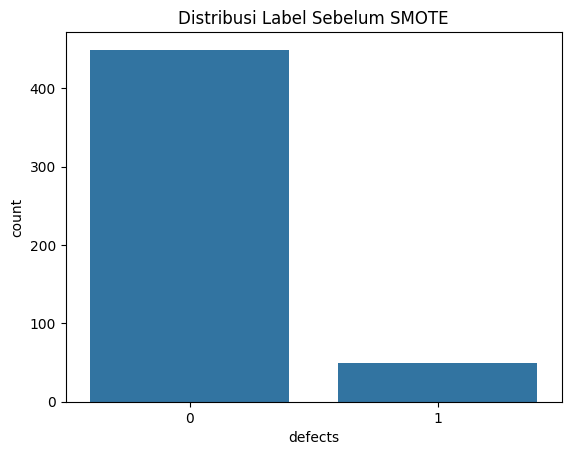

In [10]:
# 4. Cek distribusi label sebelum SMOTE
sns.countplot(x=y)
plt.title("Distribusi Label Sebelum SMOTE")
plt.show()

In [11]:
# 5. Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# 6. Terapkan SMOTE pada data latih
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

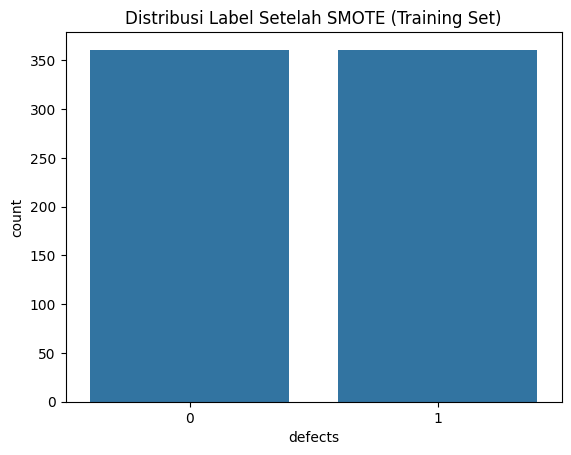

In [13]:
# 7. Cek distribusi label setelah SMOTE
sns.countplot(x=y_train_resampled)
plt.title("Distribusi Label Setelah SMOTE (Training Set)")
plt.show()

In [14]:
# 8. Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


========== Logistic Regression ==========
Akurasi: 0.82
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        88
           1       0.38      0.75      0.50        12

    accuracy                           0.82       100
   macro avg       0.67      0.79      0.70       100
weighted avg       0.89      0.82      0.84       100



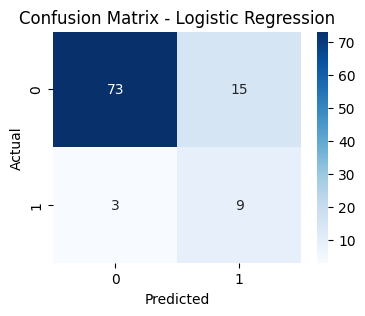


========== Random Forest ==========
Akurasi: 0.83
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        88
           1       0.00      0.00      0.00        12

    accuracy                           0.83       100
   macro avg       0.44      0.47      0.45       100
weighted avg       0.77      0.83      0.80       100



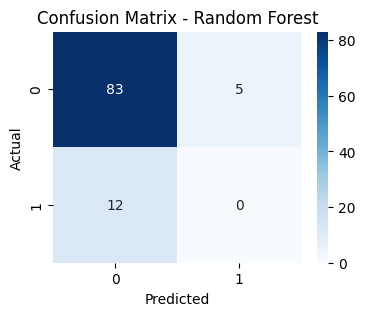


========== K-Nearest Neighbors ==========
Akurasi: 0.68
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        88
           1       0.14      0.33      0.20        12

    accuracy                           0.68       100
   macro avg       0.52      0.53      0.50       100
weighted avg       0.80      0.68      0.73       100



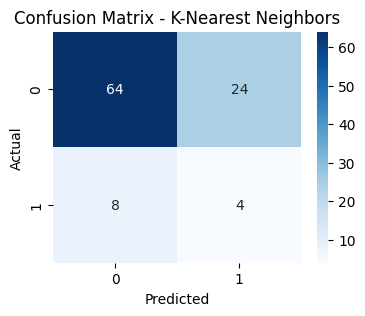

In [15]:
# 9. Latih dan evaluasi model
for name, model in models.items():
    print(f"\n========== {name} ==========")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print("Akurasi:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Berdasarkan hasil evaluasi terhadap tiga algoritma klasifikasi—Logistic Regression, Random Forest, dan K-Nearest Neighbors—dengan dataset cm1 dari NASA MDP yang telah diseimbangkan menggunakan teknik SMOTE, diperoleh bahwa:

Logistic Regression memberikan performa terbaik secara keseluruhan.

Meskipun akurasinya tidak tertinggi (82%), algoritma ini mampu mendeteksi 75% kasus defect (kelas 1), yang merupakan fokus utama dalam penelitian ini.

Sementara itu, Random Forest dan KNN gagal memberikan hasil yang memuaskan terhadap kelas defect, di mana Random Forest bahkan tidak berhasil mendeteksi satu pun modul cacat (recall = 0%).

Dengan demikian, Logistic Regression menjadi algoritma yang paling efektif dalam konteks prediksi defect perangkat lunak untuk dataset ini, karena seimbang antara akurasi dan kemampuan deteksi terhadap kelas minoritas (defect).